In [1]:
from PIL import Image
import os, numpy as np

folder = 'C:/Users/35841/images/phase2_crossroad_images_1/'
filelist=os.listdir(folder)
for fichier in filelist:
    if not(fichier.endswith(".png")):
        filelist.remove(fichier)
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims = [read(os.path.join(folder, filename)) for filename in filelist]
im_array = np.array(ims, dtype='uint8')

In [2]:
X = im_array.astype('float32') / 255.0 - 0.5

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.5, random_state=42)

In [4]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

Using TensorFlow backend.


In [5]:
im_array.shape


(1393, 50, 50, 3)

In [6]:
IMG_SHAPE = im_array.shape[1:]
IMG_SHAPE

(50, 50, 3)

In [7]:
IMG_SHAPE = im_array.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 2)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 2)                 15002     
_________________________________________________________________
sequential_2 (Sequential)    (None, 50, 50, 3)         22500     
Total params: 37,502
Trainable params: 37,502
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=100,
                validation_data=[X_test, X_test])


Train on 696 samples, validate on 697 samples
Epoch 1/100
696/696 [==============================] - 1s 751us/step - loss: 0.0522 - val_loss: 0.0331
Epoch 2/100
696/696 [==============================] - 0s 336us/step - loss: 0.0188 - val_loss: 0.0112
Epoch 3/100
696/696 [==============================] - 0s 309us/step - loss: 0.0124 - val_loss: 0.0105
Epoch 4/100
696/696 [==============================] - 0s 313us/step - loss: 0.0121 - val_loss: 0.0105
Epoch 5/100
696/696 [==============================] - 0s 327us/step - loss: 0.0120 - val_loss: 0.0104
Epoch 6/100
696/696 [==============================] - 0s 368us/step - loss: 0.0120 - val_loss: 0.0104
Epoch 7/100
696/696 [==============================] - 0s 368us/step - loss: 0.0119 - val_loss: 0.0103
Epoch 8/100
696/696 [==============================] - 0s 343us/step - loss: 0.0117 - val_loss: 0.0101
Epoch 9/100
696/696 [==============================] - 0s 334us/step - loss: 0.0114 - val_loss: 0.0098
Epoch 10/100
696/696 [====

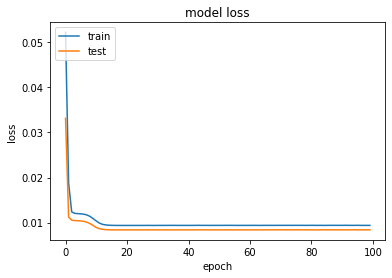

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [12]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test[i]
    #print(img[None][0])
    print(img[None])
    #visualize(img,encoder,decoder)

[[[[ 0.00196081  0.01372552 -0.01372549]
   [ 0.17450982  0.18627453  0.15882355]
   [ 0.2882353   0.3         0.27254903]
   ...
   [-0.2647059  -0.23333332 -0.22156861]
   [-0.26862746 -0.22941175 -0.22156861]
   [-0.2647059  -0.22941175 -0.20980391]]

  [[-0.01372549 -0.00196078 -0.02941176]
   [ 0.14313728  0.15490198  0.127451  ]
   [ 0.28039217  0.29215688  0.2647059 ]
   ...
   [-0.2764706  -0.24509802 -0.23333332]
   [-0.2764706  -0.24509802 -0.23333332]
   [-0.28431374 -0.2490196  -0.22941175]]

  [[-0.04509804 -0.03333333 -0.06078431]
   [ 0.03333336  0.04509807  0.01764709]
   [ 0.14705884  0.15882355  0.13137257]
   ...
   [-0.27254903 -0.24117646 -0.22941175]
   [-0.28039217 -0.2490196  -0.23725489]
   [-0.2882353  -0.2490196  -0.24117646]]

  ...

  [[-0.28039217 -0.2647059  -0.22941175]
   [-0.28039217 -0.2647059  -0.22941175]
   [-0.28039217 -0.2647059  -0.22941175]
   ...
   [-0.16274509 -0.17843136 -0.22156861]
   [-0.23725489 -0.2529412  -0.29607844]
   [-0.1862745  

In [57]:
nrsamples = im_array.shape[0]
print(nrsamples)
code_vectors = np.zeros((nrsamples,2))

for i in range(nrsamples):
    img = X[i]
    code = encoder.predict(img[None])[0]
    
    #print(code)
    code_vectors[i,:]=code
    
code_vectors.shape

1393


(1393, 2)

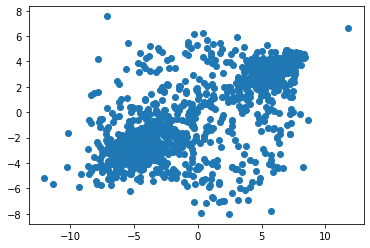

In [58]:
plt.scatter(code_vectors[:,0], code_vectors[:,1])
plt.show()

In [91]:
#!pip install mahalanobis

In [59]:
import mahalanobis
m_dist = mahalanobis.Mahalanobis(code_vectors,code_vectors.shape[0])

In [89]:
arr=np.zeros(len(code_vectors))
non_crossroad=np.where(m_dist.distances>2.0)
indices=non_crossroad[0]
len(indices)

131

In [91]:
arr[indices]=-1

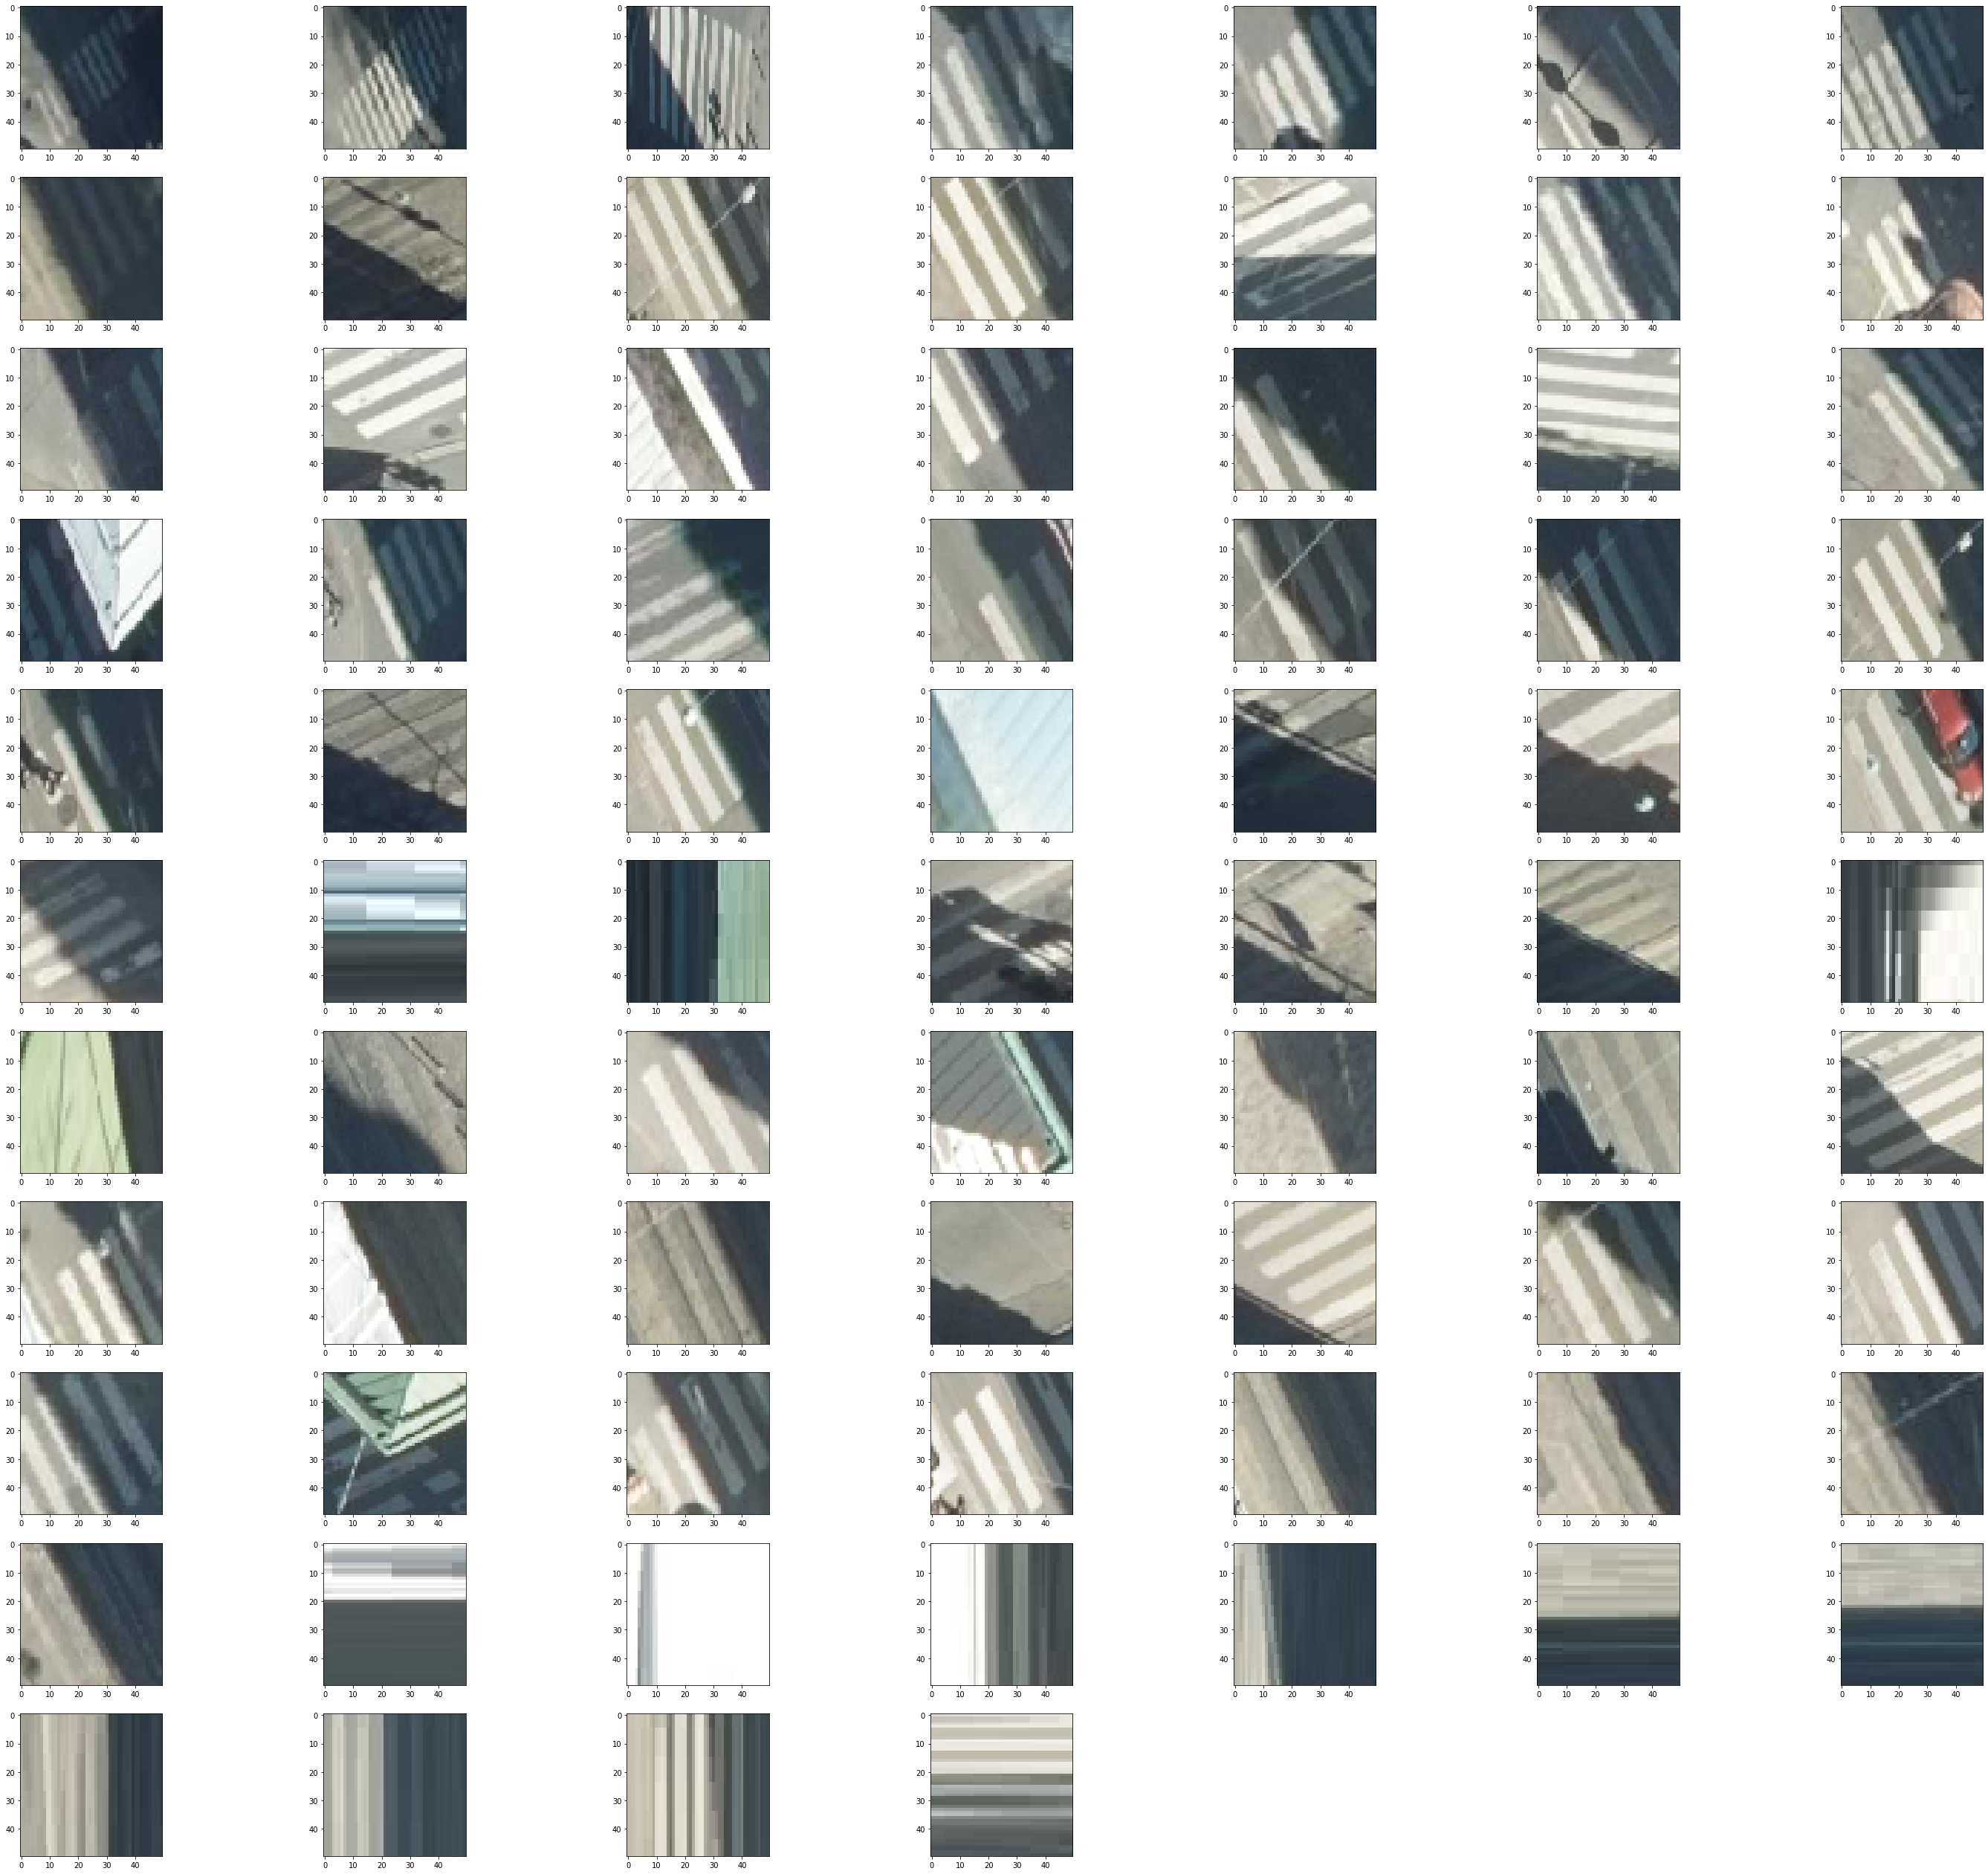

In [55]:
fig=plt.figure(figsize=(50,50))
for i in range(1,len(indices)+1):
    plt.subplot(12,7,i)
    plt.imshow(im_array[indices[i-1]])

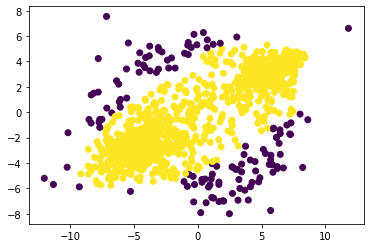

In [92]:
plt.scatter(code_vectors[:,0], code_vectors[:,1],c=arr)
plt.show()

In [55]:
#It seems from above results that the noise are basically the shadows
# The preprocessing needs histogram equilization?

In [56]:
#Let's implement DBSCAN to identify the noises and see if the result matches with above

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
code_vectors

array([[-4.35959911, -2.97383404],
       [ 5.6236105 ,  2.69164419],
       [-4.06318426, -2.72835875],
       ...,
       [-4.16826916, -2.71013975],
       [-3.26189661, -3.04178286],
       [-5.16261196, -2.38764286]])

In [84]:
clustering = DBSCAN(eps=1, min_samples=4).fit(code_vectors)

In [85]:
np.unique(clustering.labels_)


array([-1,  0,  1], dtype=int64)

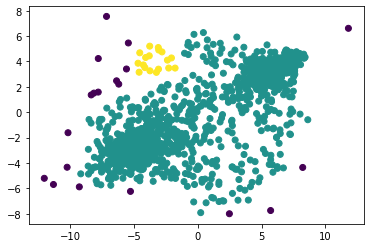

In [86]:
plt.scatter(code_vectors[:,0], code_vectors[:,1], c=clustering.labels_);

In [87]:
noise_index=[]
points=code_vectors[clustering.labels_==-1]
for item in points:
    a=np.where(code_vectors==item)
    noise_index.append(a[0][0])
len(noise_index)    

19

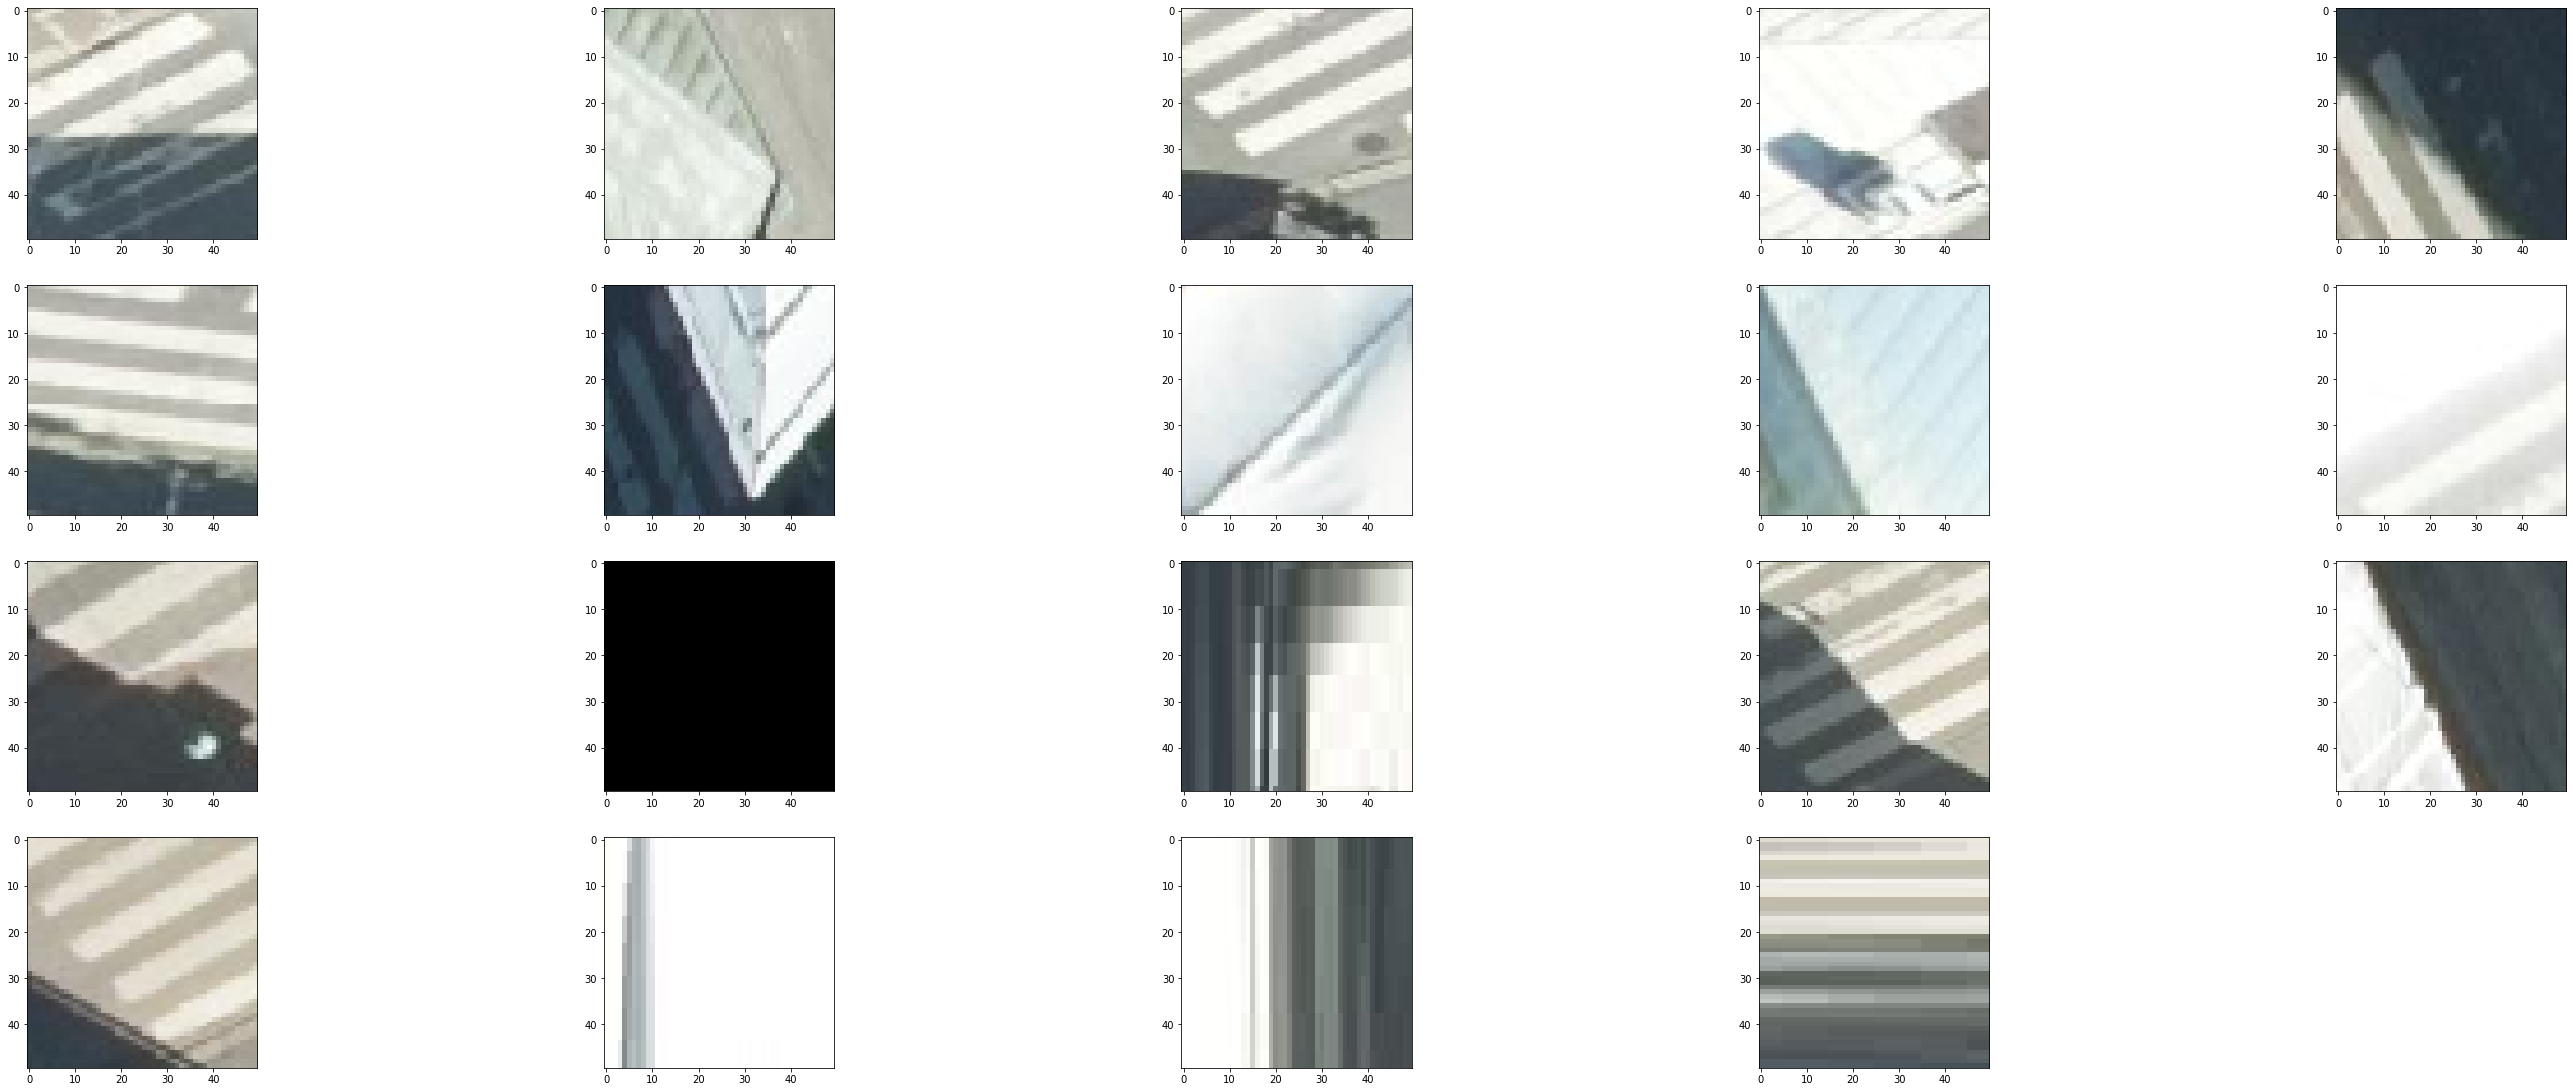

In [88]:
fig=plt.figure(figsize=(50,50))
for i in range(1,len(noise_index)+1):
    plt.subplot(10,5,i)
    plt.imshow(im_array[noise_index[i-1]])

In [71]:
a

(array([   0,    1,    2, ..., 1390, 1391, 1392], dtype=int64),)

In [75]:
a[0].shape

(1383,)